In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from imblearn.over_sampling import SMOTE

import pickle
import json

import warnings
warnings.filterwarnings('ignore')

In [29]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [31]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

### gender

In [32]:
df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [33]:
np.where(df['gender'] == 'Other')

(array([3116], dtype=int64),)

In [34]:
df.iloc[[3116]]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,56156,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


In [35]:
df.drop(3116, inplace=True)

In [36]:
df['gender'].value_counts().to_dict()

{'Female': 2994, 'Male': 2115}

In [37]:
df['gender'].replace({'Female': 0, 'Male': 1}, inplace=True)

In [38]:
# df.info()

### age

In [39]:
df['age'].value_counts()

78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
1.40       3
0.48       3
0.16       3
0.40       2
0.08       2
Name: age, Length: 104, dtype: int64

<AxesSubplot:xlabel='age'>

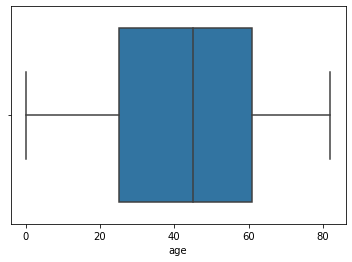

In [40]:
sns.boxplot(x = df['age'])

### hypertension

In [41]:
df['hypertension'].value_counts()

0    4611
1     498
Name: hypertension, dtype: int64

<AxesSubplot:xlabel='hypertension'>

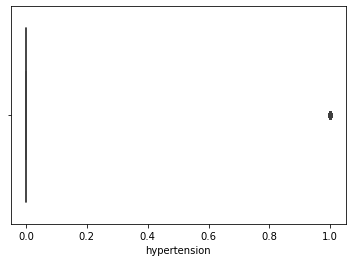

In [42]:
sns.boxplot(x = df['hypertension'])

### heart_disease

In [43]:
df['heart_disease'].value_counts()

0    4833
1     276
Name: heart_disease, dtype: int64

<AxesSubplot:xlabel='heart_disease'>

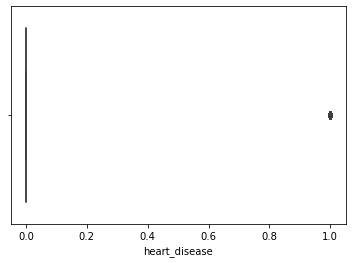

In [44]:
sns.boxplot(x = df['heart_disease'])

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5109 non-null   int64  
 1   gender             5109 non-null   int64  
 2   age                5109 non-null   float64
 3   hypertension       5109 non-null   int64  
 4   heart_disease      5109 non-null   int64  
 5   ever_married       5109 non-null   object 
 6   work_type          5109 non-null   object 
 7   Residence_type     5109 non-null   object 
 8   avg_glucose_level  5109 non-null   float64
 9   bmi                4908 non-null   float64
 10  smoking_status     5109 non-null   object 
 11  stroke             5109 non-null   int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 518.9+ KB


### ever_married

In [46]:
df['ever_married'].value_counts()

Yes    3353
No     1756
Name: ever_married, dtype: int64

In [100]:
df['ever_married'].value_counts().to_dict()

{1: 3353, 0: 1756}

In [48]:
df['ever_married'].replace({'Yes': 1, 'No': 0}, inplace=True)

### work_type

In [50]:
df['work_type'].value_counts()

Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [51]:
df = pd.get_dummies(df, columns= ['work_type'])

### Residence_type

In [53]:
df['Residence_type'].value_counts()

Urban    2596
Rural    2513
Name: Residence_type, dtype: int64

In [54]:
df['Residence_type'].value_counts().to_dict()

{'Urban': 2596, 'Rural': 2513}

In [55]:
df['Residence_type'].replace({'Urban': 0, 'Rural': 1}, inplace= True)

### avg_glucose_level

In [57]:
df['avg_glucose_level'].value_counts()

93.88     6
91.68     5
91.85     5
83.16     5
73.00     5
         ..
94.07     1
111.93    1
94.40     1
95.57     1
85.28     1
Name: avg_glucose_level, Length: 3978, dtype: int64

<AxesSubplot:xlabel='avg_glucose_level'>

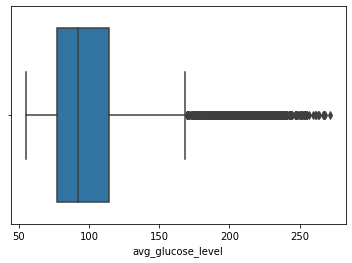

In [59]:
sns.boxplot(x = df['avg_glucose_level'])

<AxesSubplot:xlabel='avg_glucose_level', ylabel='Density'>

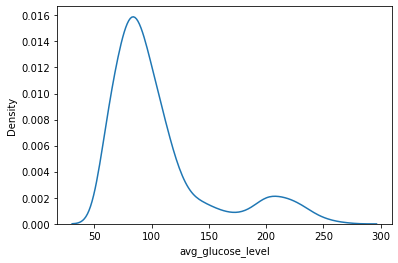

In [60]:
sns.kdeplot(x = df['avg_glucose_level'])

In [61]:
q1 = df['avg_glucose_level'].quantile(0.25)
q3 = df['avg_glucose_level'].quantile(0.75)
iqr = q3 - q1
lower_tail = q1 - 1.5 * iqr
upper_tail = q3 + 1.5 * iqr
upper_tail

169.365

In [62]:
df['avg_glucose_level'] = np.where(df['avg_glucose_level'] > upper_tail, upper_tail, df['avg_glucose_level'])

<AxesSubplot:xlabel='avg_glucose_level'>

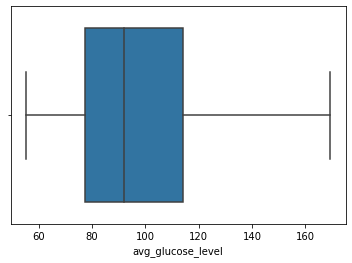

In [63]:
sns.boxplot(x = df['avg_glucose_level'])

<AxesSubplot:xlabel='avg_glucose_level', ylabel='Density'>

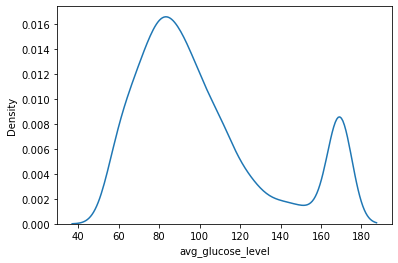

In [64]:
sns.kdeplot(x = df['avg_glucose_level'])

### bmi

In [65]:
df['bmi'].value_counts()

28.7    41
28.4    38
26.7    37
27.6    37
26.1    37
        ..
48.7     1
49.2     1
51.0     1
49.4     1
14.9     1
Name: bmi, Length: 418, dtype: int64

In [66]:
df['bmi'].median()

28.1

In [67]:
df.fillna(df['bmi'].median(), inplace=True)

<AxesSubplot:xlabel='bmi'>

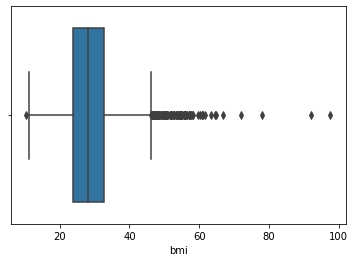

In [69]:
sns.boxplot(x = df['bmi'])

<AxesSubplot:xlabel='bmi', ylabel='Density'>

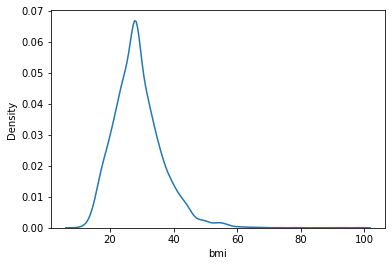

In [70]:
sns.kdeplot(x = df['bmi'])

In [71]:
q1 = df['bmi'].quantile(0.25)
q3 = df['bmi'].quantile(0.75)
iqr = q3 - q1
lower_tail = q1 - 1.5 * iqr
upper_tail = q3 + 1.5 * iqr
upper_tail

46.29999999999999

In [72]:
df['bmi'] = np.where(df['bmi'] > upper_tail, upper_tail, df['bmi'])

<AxesSubplot:xlabel='bmi'>

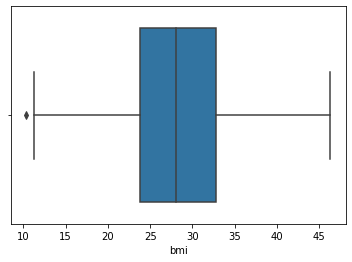

In [73]:
sns.boxplot(x = df['bmi'])

<AxesSubplot:xlabel='bmi', ylabel='Density'>

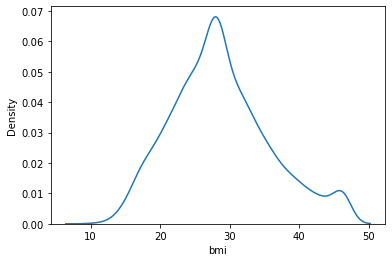

In [74]:
sns.kdeplot(x = df['bmi'])

### smoking_status

In [75]:
df['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: smoking_status, dtype: int64

In [76]:
df = pd.get_dummies(df, columns= ['smoking_status'])

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 0 to 5109
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              5109 non-null   int64  
 1   gender                          5109 non-null   int64  
 2   age                             5109 non-null   float64
 3   hypertension                    5109 non-null   int64  
 4   heart_disease                   5109 non-null   int64  
 5   ever_married                    5109 non-null   int64  
 6   Residence_type                  5109 non-null   int64  
 7   avg_glucose_level               5109 non-null   float64
 8   bmi                             5109 non-null   float64
 9   stroke                          5109 non-null   int64  
 10  work_type_Govt_job              5109 non-null   uint8  
 11  work_type_Never_worked          5109 non-null   uint8  
 12  work_type_Private               51

### Data split

In [79]:
x = df.drop(['id', 'stroke'], axis = 1)
y = df['stroke']

In [81]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=24, test_size = 0.8)

In [83]:
y_train.value_counts()

0    965
1     56
Name: stroke, dtype: int64

### SMOTE

In [84]:
smote = SMOTE(sampling_strategy= 'auto', random_state=24)
x_train_sampled, y_train_sampled = smote.fit_resample(x_train, y_train)

In [85]:
y_train_sampled.value_counts()

0    965
1    965
Name: stroke, dtype: int64

### AdaBoost

In [86]:
adaboost_clf = AdaBoostClassifier(random_state=24)
adaboost_clf.fit(x_train_sampled, y_train_sampled)

AdaBoostClassifier(random_state=24)

In [87]:
# Train Data Accuracy

y_pred_train = adaboost_clf.predict(x_train_sampled)

cnf_matrix = confusion_matrix(y_train_sampled, y_pred_train)
print('cnf_matrix :\n',cnf_matrix)
print("*"*30)

accuracy = accuracy_score(y_train_sampled, y_pred_train)
print("Accuracy Score :", accuracy) 
print("*"*30)

clf_report = classification_report(y_train_sampled, y_pred_train)
print("Classification Report :\n", clf_report)

cnf_matrix :
 [[909  56]
 [ 46 919]]
******************************
Accuracy Score : 0.9471502590673575
******************************
Classification Report :
               precision    recall  f1-score   support

           0       0.95      0.94      0.95       965
           1       0.94      0.95      0.95       965

    accuracy                           0.95      1930
   macro avg       0.95      0.95      0.95      1930
weighted avg       0.95      0.95      0.95      1930



In [88]:
# Test Data Accuracy

y_pred = adaboost_clf.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print('cnf_matrix :\n',cnf_matrix)
print("*"*30)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score :", accuracy) 
print("*"*30)

clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n", clf_report)

cnf_matrix :
 [[3597  298]
 [ 145   48]]
******************************
Accuracy Score : 0.8916340508806262
******************************
Classification Report :
               precision    recall  f1-score   support

           0       0.96      0.92      0.94      3895
           1       0.14      0.25      0.18       193

    accuracy                           0.89      4088
   macro avg       0.55      0.59      0.56      4088
weighted avg       0.92      0.89      0.91      4088



### hyperparameters

In [90]:
adaboost_clf = AdaBoostClassifier(random_state=24)

hyperparameters = {'n_estimators' : np.arange(10,50),
                   'learning_rate' : np.arange(0.01,2,0.01),}

rscv = RandomizedSearchCV(adaboost_clf ,hyperparameters, cv=5)
rscv.fit(x_train_sampled, y_train_sampled)
rscv.best_estimator_

AdaBoostClassifier(learning_rate=1.47, n_estimators=45, random_state=24)

In [91]:
adaboost_clf_model = AdaBoostClassifier(learning_rate=1.49, n_estimators=47, random_state=24)
adaboost_clf_model.fit(x_train_sampled,y_train_sampled)

AdaBoostClassifier(learning_rate=1.49, n_estimators=47, random_state=24)

In [92]:
# Train Data Accuracy

y_pred_train = adaboost_clf_model.predict(x_train_sampled)

cnf_matrix = confusion_matrix(y_train_sampled, y_pred_train)
print('cnf_matrix :\n',cnf_matrix)
print("*"*30)

accuracy = accuracy_score(y_train_sampled, y_pred_train)
print("Accuracy Score :", accuracy) 
print("*"*30)

clf_report = classification_report(y_train_sampled, y_pred_train)
print("Classification Report :\n", clf_report)

cnf_matrix :
 [[925  40]
 [ 56 909]]
******************************
Accuracy Score : 0.950259067357513
******************************
Classification Report :
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       965
           1       0.96      0.94      0.95       965

    accuracy                           0.95      1930
   macro avg       0.95      0.95      0.95      1930
weighted avg       0.95      0.95      0.95      1930



In [93]:
# Test Data Accuracy

y_pred = adaboost_clf_model.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print('cnf_matrix :\n',cnf_matrix)
print("*"*30)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score :", accuracy) 
print("*"*30)

clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n", clf_report)

cnf_matrix :
 [[3653  242]
 [ 146   47]]
******************************
Accuracy Score : 0.9050880626223092
******************************
Classification Report :
               precision    recall  f1-score   support

           0       0.96      0.94      0.95      3895
           1       0.16      0.24      0.20       193

    accuracy                           0.91      4088
   macro avg       0.56      0.59      0.57      4088
weighted avg       0.92      0.91      0.91      4088



<AxesSubplot:>

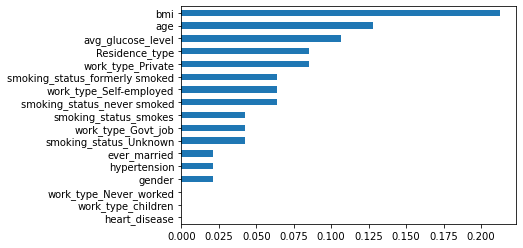

In [94]:
s1 = pd.Series(adaboost_clf_model.feature_importances_, index= x.columns)
s1.sort_values().plot(kind = 'barh')

### Testing on user data

In [98]:
x.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'Residence_type', 'avg_glucose_level', 'bmi', 'work_type_Govt_job',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children',
       'smoking_status_Unknown', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes'],
      dtype='object')

In [102]:
project_data = {'gender' :{'Female': 0, 'Male': 1},
               'ever_married' : {'No': 0, 'Yes': 1},
               'Residence_type' : {'Urban': 0, 'Rural': 1},
               'Columns' : x.columns}
project_data

{'gender': {'Female': 0, 'Male': 1},
 'ever_married': {'No': 0, 'Yes': 1},
 'Residence_type': {'Urban': 0, 'Rural': 1},
 'Columns': Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
        'Residence_type', 'avg_glucose_level', 'bmi', 'work_type_Govt_job',
        'work_type_Never_worked', 'work_type_Private',
        'work_type_Self-employed', 'work_type_children',
        'smoking_status_Unknown', 'smoking_status_formerly smoked',
        'smoking_status_never smoked', 'smoking_status_smokes'],
       dtype='object')}

In [97]:
df1 = pd.read_csv('healthcare-dataset-stroke-data.csv')
df1.head(1).T

,0
id,9046
gender,Male
age,67.0
hypertension,0
heart_disease,1
ever_married,Yes
work_type,Private
Residence_type,Urban
avg_glucose_level,228.69
bmi,36.6


In [124]:
df1.tail(1).T

,5109
id,44679
gender,Female
age,44.0
hypertension,0
heart_disease,0
ever_married,Yes
work_type,Govt_job
Residence_type,Urban
avg_glucose_level,85.28
bmi,26.2


In [125]:
gender             = 'Female'
age                = 44.0
hypertension       = 0
heart_disease      = 0
ever_married       = 'Yes'
work_type          = 'Govt_job'
Residence_type     = 'Urban'
avg_glucose_level  = 85.28
bmi                = 26.2
smoking_status     = 'Unknown'

gender         = project_data['gender'][gender]
ever_married   = project_data['ever_married'][ever_married]
Residence_type = project_data['Residence_type'][Residence_type]

work_type = 'work_type_' + work_type
work_type_index = np.where(project_data['Columns'] == work_type)
work_type_index

smoking_status = 'smoking_status_' + smoking_status
smoking_status_index = np.where(project_data['Columns'] == smoking_status)
smoking_status_index

test_array = np.zeros(x.shape[1])
test_array[0] = gender
test_array[1] = age
test_array[2] = hypertension
test_array[3] = heart_disease
test_array[4] = ever_married
test_array[5] = Residence_type
test_array[6] = avg_glucose_level
test_array[7] = bmi
test_array[work_type_index] = 1
test_array[smoking_status_index] = 1

print(test_array)

stoke_prediction = adaboost_clf_model.predict([(test_array)])[0]
stoke_prediction

[ 0.   44.    0.    0.    1.    0.   85.28 26.2   1.    0.    0.    0.
  0.    1.    0.    0.    0.  ]


0

In [122]:
gender             = 'Male'
age                = 67.0
hypertension       = 0
heart_disease      = 1
ever_married       = 'Yes'
work_type          = 'Private'
Residence_type     = 'Urban'
avg_glucose_level  = 228.69
bmi                = 36.6
smoking_status     = 'formerly smoked'

gender         = project_data['gender'][gender]
ever_married   = project_data['ever_married'][ever_married]
Residence_type = project_data['Residence_type'][Residence_type]

work_type = 'work_type_' + work_type
work_type_index = np.where(project_data['Columns'] == work_type)
work_type_index

smoking_status = 'smoking_status_' + smoking_status
smoking_status_index = np.where(project_data['Columns'] == smoking_status)
smoking_status_index

test_array = np.zeros(x.shape[1])
test_array[0] = gender
test_array[1] = age
test_array[2] = hypertension
test_array[3] = heart_disease
test_array[4] = ever_married
test_array[5] = Residence_type
test_array[6] = avg_glucose_level
test_array[7] = bmi
test_array[work_type_index] = 1
test_array[smoking_status_index] = 1

print(test_array)

stoke_prediction = adaboost_clf_model.predict([(test_array)])[0]
stoke_prediction

[  1.    67.     0.     1.     1.     0.   228.69  36.6    0.     0.
   1.     0.     0.     0.     1.     0.     0.  ]


1

In [128]:
project_data = {'gender' :{'Female': 0, 'Male': 1},
               'ever_married' : {'No': 0, 'Yes': 1},
               'Residence_type' : {'Urban': 0, 'Rural': 1},
               'Columns' : x.columns.to_list()}
project_data

{'gender': {'Female': 0, 'Male': 1},
 'ever_married': {'No': 0, 'Yes': 1},
 'Residence_type': {'Urban': 0, 'Rural': 1},
 'Columns': ['gender',
  'age',
  'hypertension',
  'heart_disease',
  'ever_married',
  'Residence_type',
  'avg_glucose_level',
  'bmi',
  'work_type_Govt_job',
  'work_type_Never_worked',
  'work_type_Private',
  'work_type_Self-employed',
  'work_type_children',
  'smoking_status_Unknown',
  'smoking_status_formerly smoked',
  'smoking_status_never smoked',
  'smoking_status_smokes']}

In [126]:
with open ('adaboost_clf_model_file.pkl', 'wb') as f:
    pickle.dump(adaboost_clf_model, f)

In [129]:
with open ('project_data.json', 'w') as f:
    json.dump(project_data, f)